# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 

<!-- 
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [2]:
import librosa
import os
import librosa.display
import IPython.display as ipd
from IPython.core.display import display
import scipy

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

.wav файл хранит в себе две области: заголовок файла и область данных.

В заголовке хранится различная информация об аудио-файле, в том числе и параметры дискретизации и квантования

### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

Ниже находится скрипт для записи голоса в colab  
[Источник](https://gist.github.com/korakot/c21c3476c024ad6d56d5f48b0bca92be)

In [3]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
    display(Javascript(RECORD))
    s = output.eval_js('record(%d)' % (sec*1000))
    b = b64decode(s.split(',')[1])
    audio = AudioSegment.from_file(BytesIO(b))
    return audio

<IPython.core.display.Javascript object>

sample_rate = 22050


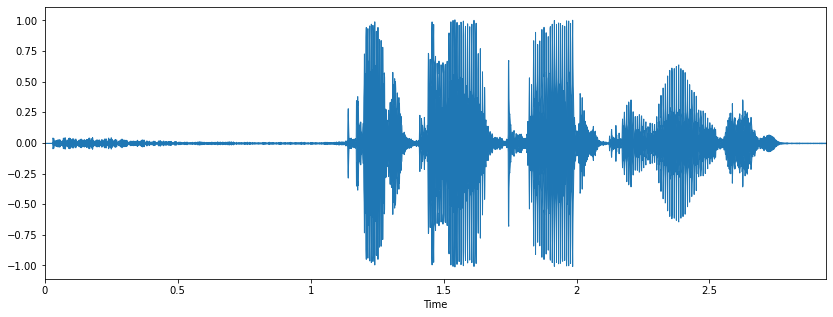

In [4]:
record().export('record.wav', format='wav')
wav, sample_rate = librosa.core.load('record.wav')
plt.figure(figsize=(14, 5))
librosa.display.waveplot(wav, sr=sample_rate)
print(f'sample_rate = {sample_rate}')
ipd.Audio(wav, rate=sample_rate)

In [5]:
for sr in (16000, 8000, 4000, 2000, 1000):
    print(f'sample_rate = {sr}')    
    display(ipd.Audio(librosa.resample(wav, sample_rate, sr), rate=sr))

sample_rate = 16000


sample_rate = 8000


sample_rate = 4000


sample_rate = 2000


sample_rate = 1000


При sample_rate = 1000 Гц речь уже становится неразборчива

In [6]:
os.remove('record.wav')

### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

.wav хранит несжатый звук, благодаря чему файл можно использовать на любой частоте дискретизации без потерь качества на восстановлении, в отличии от mp3 и ogg формата, они сжимают звук, но зато эти файлы меньше весят

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [7]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10, 
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k', 
        linewidth = 1)
    plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
    plt.show()

In [8]:
# Читаем данные с подготовленными сигналами
import pickle
with open("resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

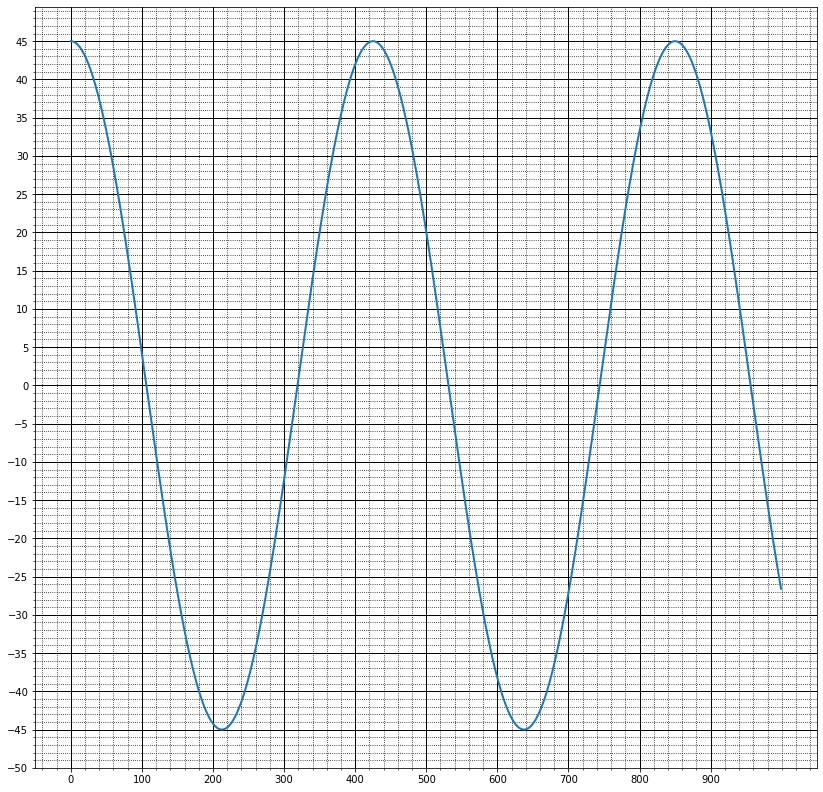

In [9]:
draw_signal(test_data['task2']['a'])

In [10]:
# YOUR CODE HERE
a = 45 * np.cos(2 * np.pi / 425 * np.arange(1000))

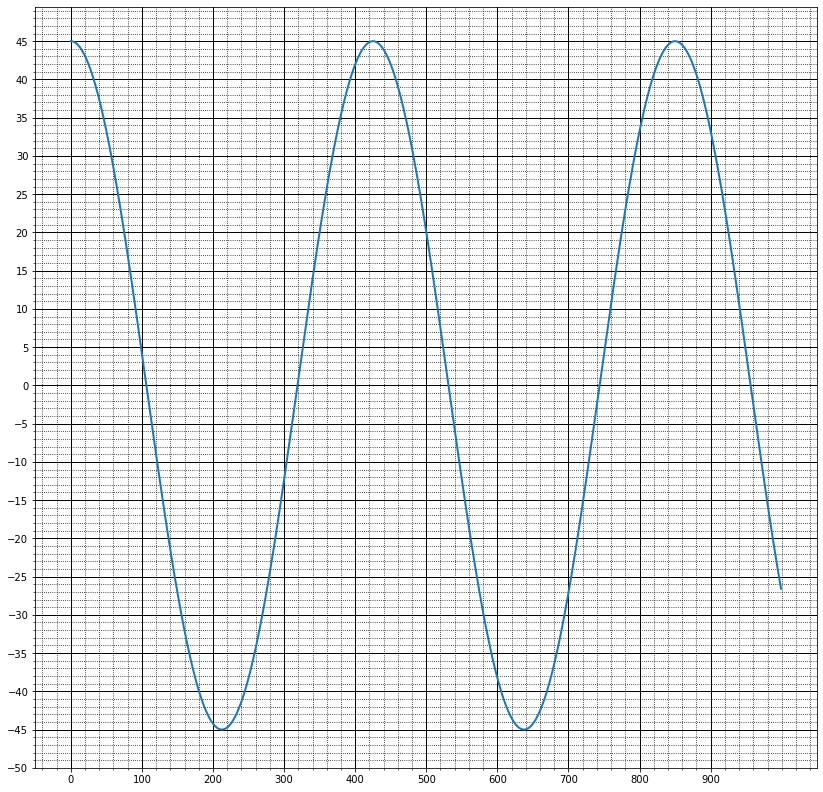

In [11]:
draw_signal(a)

In [12]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= 45$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = \frac{2 \pi}{425}$

3. Фаза - $\phi= 0$

### Сигнал ***b***

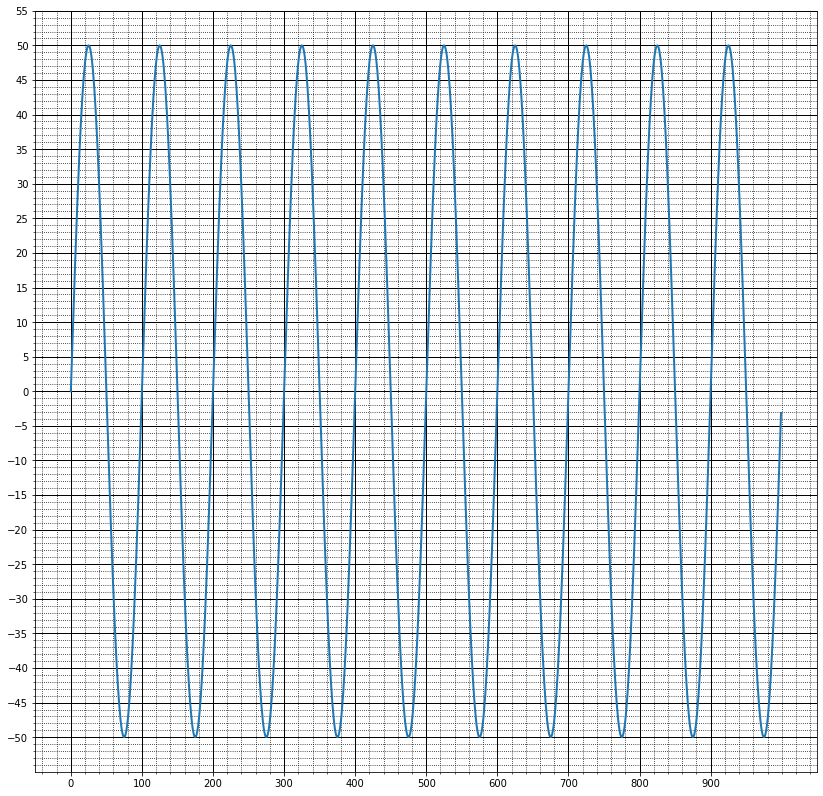

In [13]:
draw_signal(test_data['task2']['b'])

In [14]:
# YOUR CODE HERE
b = 50 * np.cos(np.pi / 50 * np.arange(1000) + 3 * np.pi / 2)

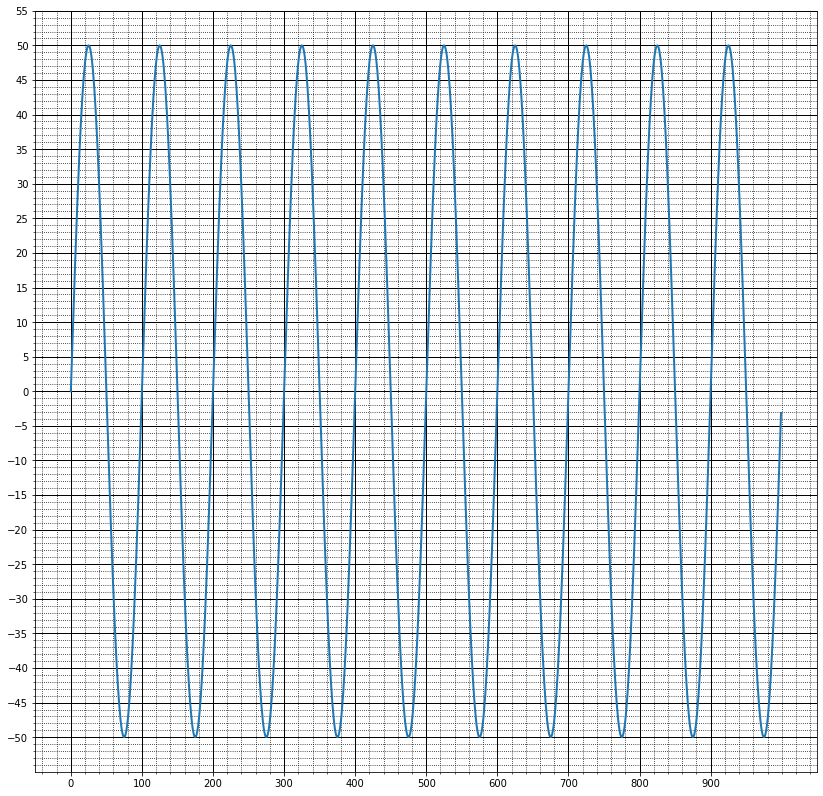

In [15]:
draw_signal(b)

In [16]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= 50$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = \frac{\pi}{50}$

3. Фаза - $\phi= \frac{3 \pi}{2}$

### Сигнал ***c***

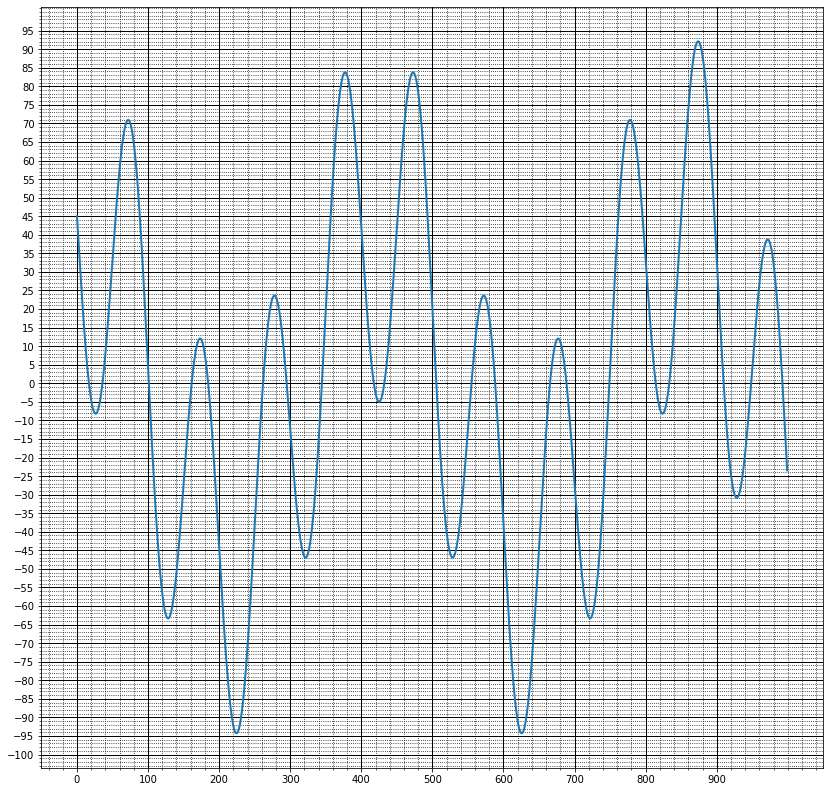

In [17]:
draw_signal(test_data['task2']['c'])

In [18]:
# сигнал состоит из двух гармоник
# YOUR CODE HERE
c = a - b

In [19]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [20]:
def convolve(in1, in2):
    #YOUR CODE HERE
    if len(in1) < len(in2):
        in1, in2 = in2, in1
    
    n, m = len(in1), len(in2)
    res = np.zeros(n + m - 1)

    for i in range(n + m - 1):
        left, right = max(0, i - m + 1), min(i, n - 1)
        for j in range(left, right + 1):
            res[i] += in1[j] * in2[m - 1 - i + j]
    
    return res

In [21]:
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [22]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

In [23]:
test_convolve(a, b, print_debug=False)

Ok!


### Нарисуйте результат свертки a и b

Сигнал **а**

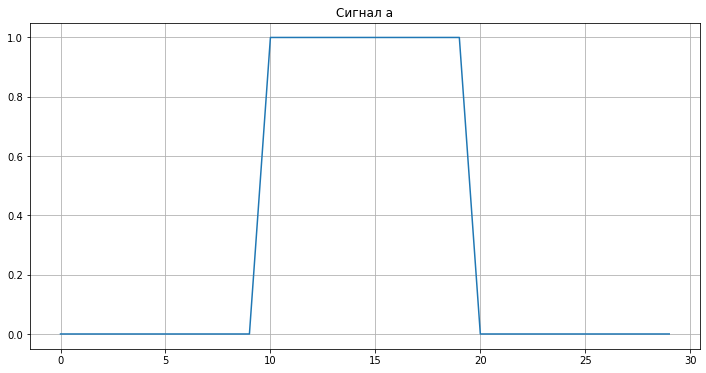

In [24]:
# YOUR CODE HERE
plt.figure(figsize=(12, 6))
plt.plot(a)
plt.title('Сигнал a')
plt.grid()
plt.show()

Сигнал **b**

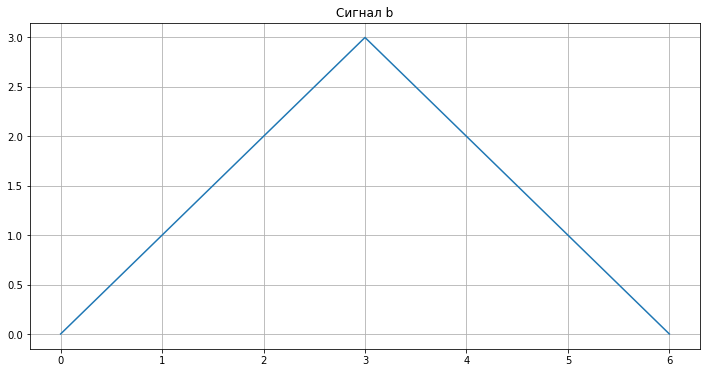

In [25]:
# YOUR CODE HERE
plt.figure(figsize=(12, 6))
plt.plot(b)
plt.title('Сигнал b')
plt.grid()
plt.show()

Свертка **a** и **b**

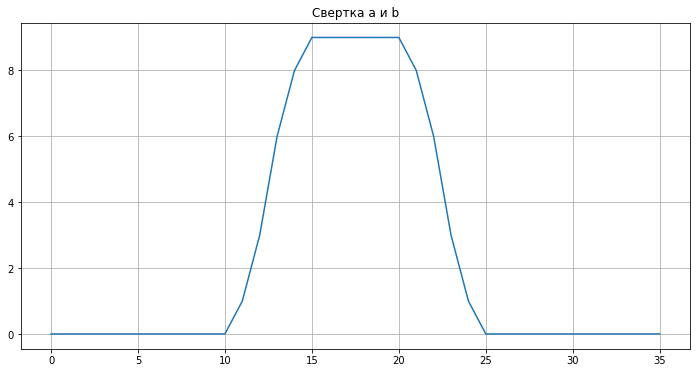

In [26]:
# YOUR CODE HERE
plt.figure(figsize=(12, 6))
plt.plot(convolve(a, b))
plt.title('Свертка a и b')
plt.grid()
plt.show()

Все 3 графика на одной картинке:

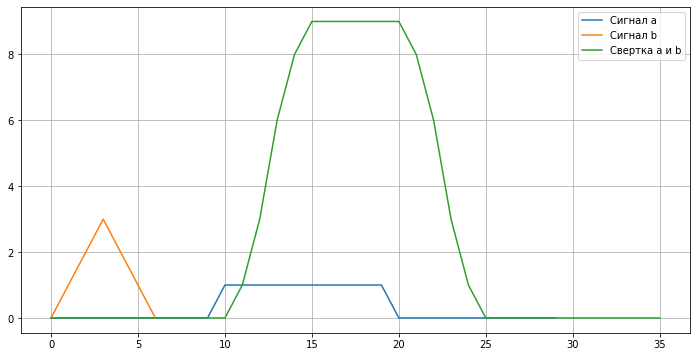

In [27]:
# YOUR CODE HERE
plt.figure(figsize=(12, 6))
plt.plot(a, label='Сигнал a')
plt.plot(b, label='Сигнал b')
plt.plot(convolve(a, b), label='Свертка a и b')
plt.legend()
plt.grid()
plt.show()

# Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [28]:
def karplus_strong(noise, N):
    # Noise - input
    # N - number of samples to generate
    # return y - generated signal based on Noise 
    # YOUR CODE HERE

    y, m = noise, len(noise)
    y = np.pad(y, (0, N - m), 'constant')
    for i in range(m, N):
        y[i] = (y[i - m] + y[i - m - 1]) / 2
    return y

In [29]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

All Ok!


### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

In [30]:
# YOUR CODE HERE
freqs_of_strings = {
    'Первая струна (ми первой октавы)': 329.63,
    'Вторая струна (си малой октавы)': 246.94,
    'Третья струна (соль малой октавы)': 196.00,
    'Четвертая струна (ре малой октавы)': 146.83,
    'Пятая струна (ля большой октавы)': 110.00,
    'Шестая струна (ми большой октавы)': 82.41 
}

def generate_sound_of_string(freq, name, plot=False, sample_rate=44100, sec=2):
    gen_len = sample_rate * sec
    noise = (2 * np.random.uniform(-1, 1, int(sample_rate/freq)))
    gen_wav = karplus_strong(noise, gen_len)
    
    if plot:
        plt.figure(figsize=(10,5))
        plt.xlabel('n', fontsize=14)
        plt.ylabel('Амплитуда', fontsize=14)
        plt.xlim(0, gen_len)
        plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
        plt.tick_params(axis='both', which='major', labelsize=14)
        plt.grid()
        plt.title(name)
    else:
        print(name)
        display(ipd.Audio(gen_wav, rate=sample_rate))

for name, freq in freqs_of_strings.items():
    generate_sound_of_string(freq=freq, name=name)

Первая струна (ми первой октавы)


Вторая струна (си малой октавы)


Третья струна (соль малой октавы)


Четвертая струна (ре малой октавы)


Пятая струна (ля большой октавы)


Шестая струна (ми большой октавы)


Визуализируем затухание амплитуды:

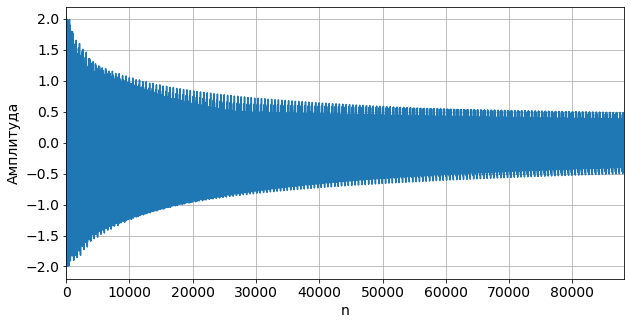

In [31]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

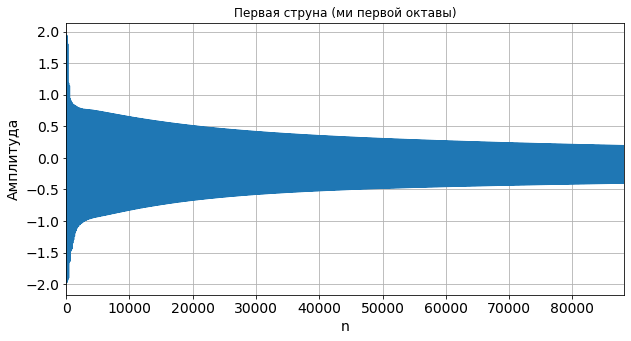

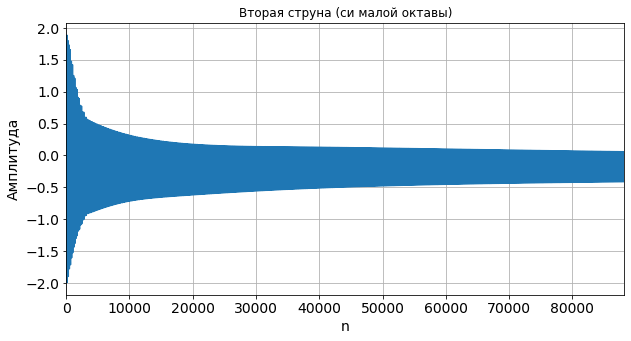

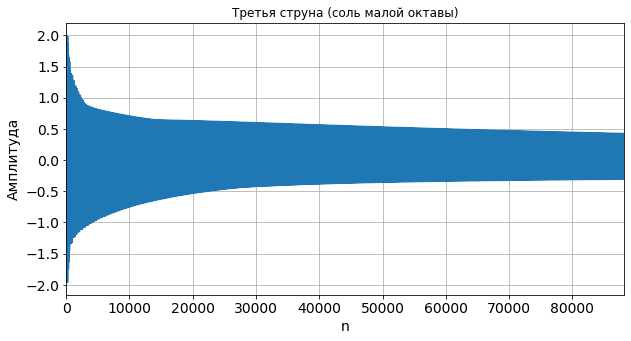

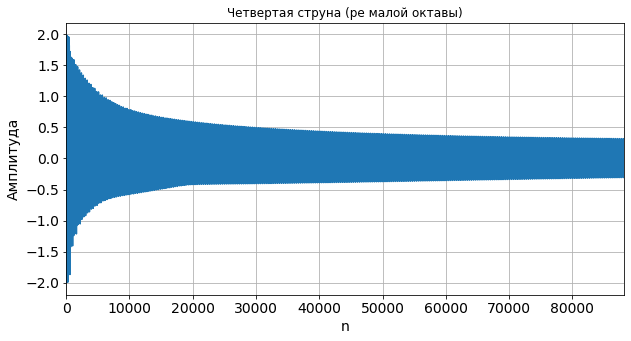

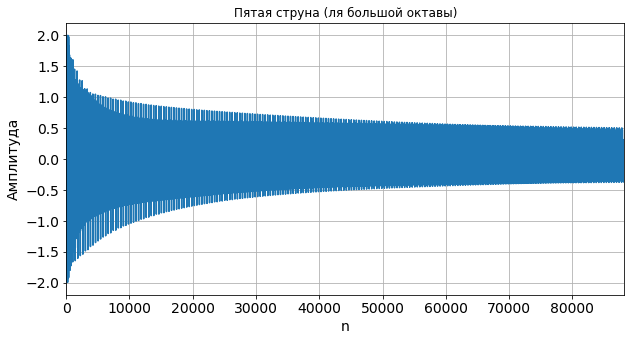

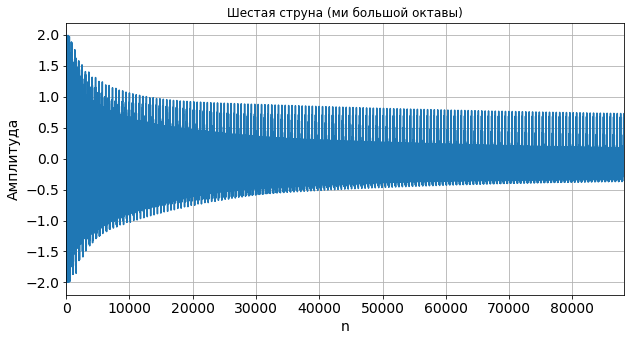

In [32]:
# YOUR CODE HERE
for name, freq in freqs_of_strings.items():
    generate_sound_of_string(freq=freq, name=name, plot=True)